# A small example with all main functionalities of FlowSets
- In this notebook the input is first processed and then the FlowSets are created.
- A pattern is defined and the resulting memberships are analysed.

---
Author: Felix Offensperger

centers [-2, -1, 0, 1, 2]
Creating Universe Range -13.0 -> 4.0 with step size 0.01


/mnt/raidbio/extproj/projekte/FlowSets/small_example/../flowset.py:661: RuntimeWarning: invalid value encountered in divide
  values = fuzz.trimf(self.universe, abc)/unscaledValues


Mean Expr log2FoldChange col 1
Expr Count cell_expr col 8
SD None col None
Cluster comparison col 6
Combining over state:  False
to_homogeneous: HSF1.KD vs Wildtype
to_homogeneous: MSN24.KO vs Wildtype
to_homogeneous: Double.KDKO vs Wildtype


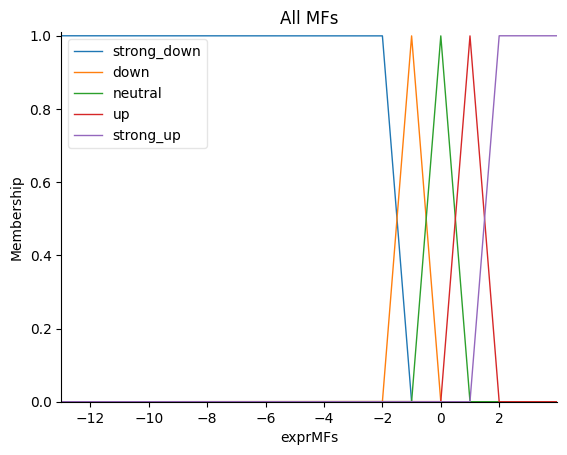

In [1]:
# Import FlowSets and fuzzify the data
# For each comparison, we will create a FlowSets state and apply the same fuzzification
# Here five classes are used: strong_down, down, neutral, up, strong_up
# The centers are set to -2, -1, 0, 1, 2 for these classes
import os, sys
sys.path.insert(0, "../")
from flowset import *

# Read in data as polars dataframe
data = pl.read_csv(
    'deseq2_results_25deg_all_comparisons_cleaned.csv',
    null_values=['NA'],
    schema={
        "baseMean": pl.Float32,
        "log2FoldChange": pl.Float32,
        "lfcSE": pl.Float32,
        "stat": pl.Float32,
        "pvalue": pl.Float32,
        "padj": pl.Float32,
        "comparison": pl.Utf8,
        "gene_id": pl.Utf8
    }
)

# Fuzzify the log2FoldChange values for each gene and comparison
explDFWide, mfFuzzy = LegacyFuzzifier.fuzzify(
    data, stepsize=0.01,
    symbol_column="gene_id", meancolName="log2FoldChange", sdcolName=None, exprcolName=None, clusterColName="comparison",
    mfLevels = ["strong_down","down","neutral","up", "strong_up"], centers=[-2, -1, 0, 1, 2],
    
)

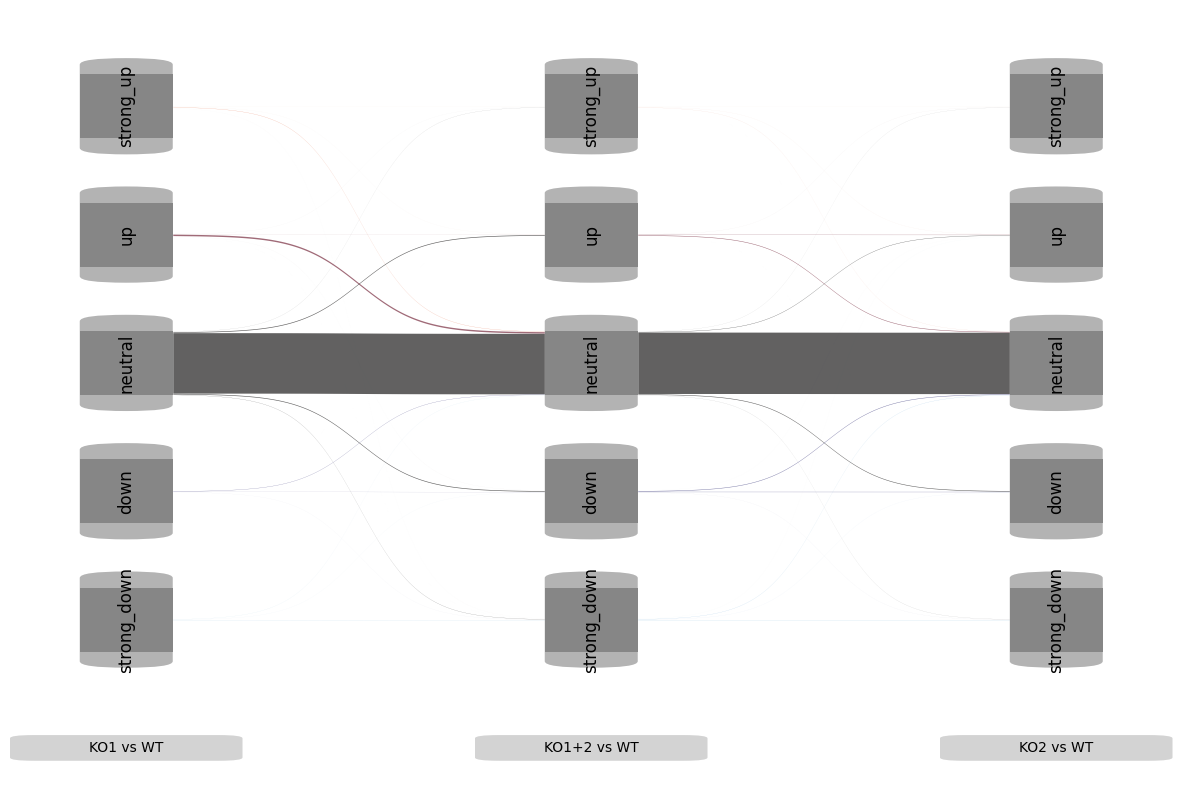

In [2]:
# Create a FlowAnalysis object for the fuzzified data
# Define the mapping from comparison names to display names and order
series2name=(
       ("HSF1.KD vs Wildtype",'KO1 vs WT'),
        ("Double.KDKO vs Wildtype",'KO1+2 vs WT'),
       ("MSN24.KO vs Wildtype",'KO2 vs WT')
    )

fa= FlowAnalysis(explDFWide,"gene_id", series2name, mfFuzzy) 

# Plot the flow memberships for all genes
fa.plot_flows(figsize=(15, 10),outfile="./plots/complete_flow")

Adding title Solis et al. 2016 - KO1 dependent genes


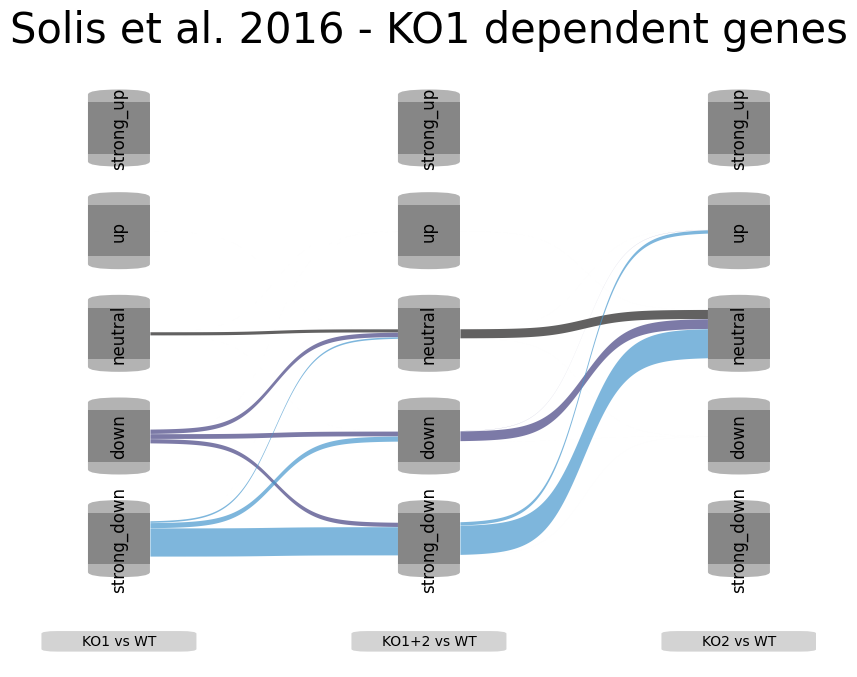

In [3]:
# Plot flows for a set of genes of interest (from Solis et al. 2016)
solis_genes = ["YAL005C", "YBR101C", "YDR171W", "YDR214W", "YDR258C", "YFL016C", "YGR142W", "YLL024C", "YLL026W", "YLR216C", "YMR186W", "YNL007C", "YNL064C", "YNL281W", "YOR027W", "YOR298C-A", "YPL240C", "YPR158W"]
fa.plot_flows(genes=solis_genes, title="Solis et al. 2016 - KO1 dependent genes", figsize=(10, 8),outfile="./plots/geneset_flow")

Found 15 of 18 (query) in 30 (top) genes.


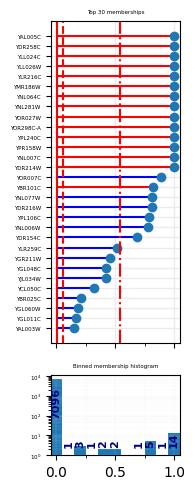

Loading pathways from ./goslim.gmt
Identified 98 pathways
Calculating p-values for groups [1, 2, 3, 4, 10, 50, 100]


,pwid,pwname,pwFlow,pwGenes,allPwFlow,allPwGenes,pw_gene_intersection,pw_coverage,genes_coverage,mean_coverage,pw_coverage_zscore,pw_coverage_pval,pw_coverage_adj_pval
98,solis annotated genes,solis annotated genes,14.824517,18,22.435169,1071.00017,18,8.235843e-01,6.607713e-01,5.442009e-01,8.192189,1.282587e-16,1.269761e-14
71,response_to_heat,response_to_heat,1.000001,9,22.435169,1071.00017,9,1.111112e-01,4.457291e-02,4.952549e-03,3.134766,8.599565e-04,4.256784e-02
65,regulation_of_organelle_organization,regulation_of_organelle_organization,1.808084,53,22.435169,1071.00017,53,3.411479e-02,8.059149e-02,2.749362e-03,2.273431,1.150011e-02,3.795036e-01
36,mitochondrion_organization,mitochondrion_organization,2.000443,73,22.435169,1071.00017,73,2.740333e-02,8.916549e-02,2.443431e-03,1.678919,4.658389e-02,1.000000e+00
91,transmembrane_transport,transmembrane_transport,2.000006,79,22.435169,1071.00017,79,2.531653e-02,8.914602e-02,2.256868e-03,1.494068,6.757894e-02,1.000000e+00
54,protein_folding,protein_folding,3.000211,21,22.435169,1071.00017,21,1.428672e-01,1.337280e-01,1.910534e-02,1.277727,1.006729e-01,1.000000e+00
69,response_to_chemical_stimulus,response_to_chemical_stimulus,1.632770,93,22.435169,1071.00017,93,1.755666e-02,7.277724e-02,1.277725e-03,0.806686,2.099236e-01,1.000000e+00
61,proteolysis_involved_in_cellular_protein_catab...,proteolysis_involved_in_cellular_protein_catab...,0.824638,57,22.435169,1071.00017,57,1.446733e-02,3.675647e-02,5.317678e-04,0.533028,2.970070e-01,1.000000e+00
49,peroxisome_organization,peroxisome_organization,0.808081,14,22.435169,1071.00017,14,5.772004e-02,3.601848e-02,2.078988e-03,0.412835,3.398637e-01,1.000000e+00
30,lipid_metabolic_process,lipid_metabolic_process,0.808099,62,22.435169,1071.00017,62,1.303385e-02,3.601928e-02,4.694698e-04,0.406048,3.423535e-01,1.000000e+00


Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'pw_coverage_zscore', 'pw_coverage_pval',
       'pw_coverage_adj_pval'],
      dtype='object')
False
False
(10, 14)


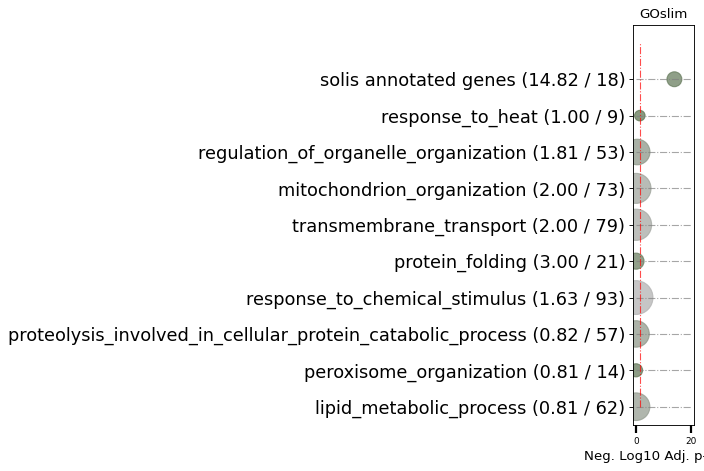

In [4]:
# Find genes with specific flow patterns and perform pathway analysis
relFlow=fa.flow_finder(["?","?"],minLevels=[None,None,"down"],maxLevels=["down","down","up"],verbose=False)
fa.plot_flow_memberships(use_edges=relFlow,color_genes=solis_genes,outfile="./plots/pattern_memberships")

# Pathway analysis using GOslim and additional gene sets
pw_file="./goslim.gmt"
pwScores = fa.analyse_pathways(use_edges=relFlow,genesets_file=pw_file,additional_genesets=[("solis annotated genes", solis_genes)])
pwScores_signif=pwScores.sort_values("pw_coverage_pval", ascending=True).head(20)
display(pwScores_signif)
fa.plotORAresult(pwScores_signif, "GOslim", numResults=10, figsize=(6,6), outfile="./plots/goslim_pathway_analysis")